<a href="https://colab.research.google.com/github/NP-15/Machine-learning/blob/main/Sessions/Reinforcement-Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Creating the classes

In [ ]:
class MarkovDecisionProcess:
    def __init__(self, n_states, n_actions, transition_probs, rewards, gamma=0.9):
        self.n_states = n_states
        self.n_actions = n_actions
        self.transition_probs = transition_probs
        self.rewards = rewards
        self.gamma = gamma

    def value_iteration(self, epsilon=0.01):
        V = np.zeros(self.n_states)
        while True:
            prev_V = np.copy(V)
            for s in range(self.n_states):
                V[s] = max([sum([self.transition_probs[s][a][s1] * (self.rewards[s][a][s1] + self.gamma * prev_V[s1]) for s1 in range(self.n_states)]) for a in range(self.n_actions)])
            if np.max(np.abs(prev_V - V)) < epsilon:
                break
        return V

class QLearning:
    def __init__(self, n_states, n_actions, transition_probs, rewards, alpha=0.1, gamma=0.9, epsilon=0.1, n_iter=10000):
        self.n_states = n_states
        self.n_actions = n_actions
        self.transition_probs = transition_probs
        self.rewards = rewards
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_iter = n_iter
        self.Q = np.zeros((n_states, n_actions))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(range(self.n_actions))
        else:
            return np.argmax(self.Q[state, :])

    def update_Q(self, state, action, reward, next_state):
        self.Q[state, action] += self.alpha * (reward + self.gamma * np.max(self.Q[next_state, :]) - self.Q[state, action])

    def fit(self):
        for _ in range(self.n_iter):
            state = np.random.randint(0, self.n_states)
            for _ in range(100):
                action = self.choose_action(state)
                next_state = np.random.choice(range(self.n_states), p=self.transition_probs[state][action])
                reward = self.rewards[state][action][next_state]
                self.update_Q(state, action, reward, next_state)
                state = next_state
        return self.Q

### Markov Decision Process

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class MarkovDecisionProcess:
    def __init__(self, n_states, n_actions, transition_probs, rewards, gamma=0.9):
        self.n_states = n_states
        self.n_actions = n_actions
        self.transition_probs = transition_probs
        self.rewards = rewards
        self.gamma = gamma

    def value_iteration(self, tol=1e-3):
        V = np.zeros(self.n_states)
        while True:
            Q = np.zeros((self.n_states, self.n_actions))
            for s in range(self.n_states):
                for a in range(self.n_actions):
                    Q[s, a] = np.sum(self.transition_probs[a][s] * (self.rewards[a][s] + self.gamma * V), axis=1)
            V_new = np.max(Q, axis=1)
            if np.max(np.abs(V - V_new)) < tol:
                break
            V = V_new
        return V

    def optimal_policy(self, V):
        Q = np.zeros((self.n_states, self.n_actions))
        for s in range(self.n_states):
            for a in range(self.n_actions):
                Q[s, a] = np.sum(self.transition_probs[a][s] * (self.rewards[a][s] + self.gamma * V), axis=1)
        return np.argmax(Q, axis=1)

transition_probs = np.array([
    [
        [0.7, 0.3],
        [0.3, 0.7]
    ],
    [
        [0.5, 0.5],
        [0.8, 0.2]
    ]
])

rewards = np.array([
    [
        [10, 0],
        [0, 0]
    ],
    [
        [0, 0],
        [0, 0]
    ]
])

mdp = MarkovDecisionProcess(n_states=2, n_actions=2, transition_probs=transition_probs, rewards=rewards)

V = mdp.value_iteration()
optimal_policy = mdp.optimal_policy(V)

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for i in range(mdp.n_states):
    G.add_node(i, label='State {}'.format(i))

# Add edges
for s in range(mdp.n_states):
    for a in range(mdp.n_actions):
        next_state = np.argmax(transition_probs[a][s])
        G.add_edge(s, next_state, label='Action {}'.format(a))

# Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')
edge_labels = {(i, j): d['label'] for i, j, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title('Optimal Path for MDP')
plt.show()


AxisError: axis 1 is out of bounds for array of dimension 1

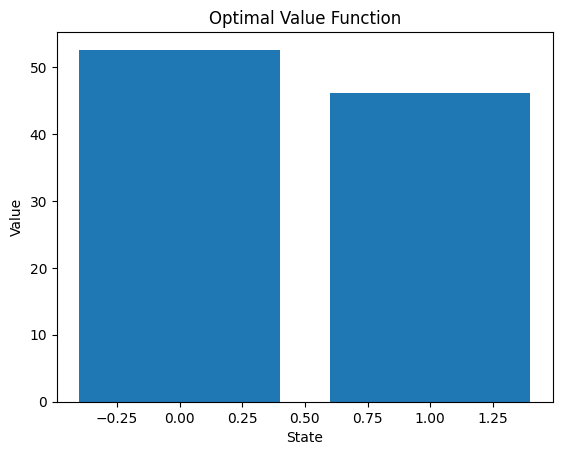

In [ ]:
plt.bar(range(len(V)), V)
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Optimal Value Function')
plt.show()

### Q-Learning

In [ ]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1
n_iter = 10000

transition_probs = [
    [[0.7, 0.3], [0.3, 0.7]],
    [[0.5, 0.5], [0.8, 0.2]]
]

rewards = [
    [[10, 0], [0, 0]],
    [[0, 0], [0, 0]]
]

q_learning = QLearning(n_states=2, n_actions=2, transition_probs=transition_probs, rewards=rewards, alpha=alpha, gamma=gamma, epsilon=epsilon, n_iter=n_iter)

Q = q_learning.fit()

print("\nQ-values:")
print(Q)


Q-values:
[[52.12366545 41.07238729]
 [42.1009586  44.12500692]]


### Bellman Equation

In [ ]:
import numpy as np

class MarkovDecisionProcess:
    def __init__(self, n_states, n_actions, transition_probs, rewards, gamma=0.9):
        self.n_states = n_states
        self.n_actions = n_actions
        self.transition_probs = transition_probs
        self.rewards = rewards
        self.gamma = gamma

    def bellman_equation(self, V):
        Q = np.zeros((self.n_states, self.n_actions))
        for s in range(self.n_states):
            for a in range(self.n_actions):
                Q[s, a] = sum([self.transition_probs[s][a][s1] * (self.rewards[s][a][s1] + self.gamma * V[s1]) for s1 in range(self.n_states)])
        return Q

transition_probs = np.array([
    [
        [0.7, 0.3],
        [0.3, 0.7]
    ],
    [
        [0.5, 0.5],
        [0.8, 0.2]
    ]
])

rewards = np.array([
    [
        [10, 0],
        [0, 0]
    ],
    [
        [0, 0],
        [0, 0]
    ]
])

mdp = MarkovDecisionProcess(n_states=2, n_actions=2, transition_probs=transition_probs, rewards=rewards)

Q = mdp.bellman_equation(V)

print("Q-values:")
print(Q)


Q-values:
[[52.58644829 43.27452168]
 [44.43048499 46.16442994]]
